# Rocket Assignment

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following expression:

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 5 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using Euler's method with a time-step size of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.

In [16]:
#essential libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Set the font family and size to use for Matplotlib figures.
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

In [18]:
#Euler's method(too lazy to write descriptin D:)
def Euler_method(u, dt, f, *args):
    u_new = u + dt*f(u, *args)
    return u_new

In [19]:
def weight_of_propellant(t, mp0):
    if t< 5:
        return mp0*(1-t/5)
    else:
        return 0

def rate_of_burn(t):
    if t<5:
        return 20
    else:
        return 0

In [20]:
def rhs_rocket(u, weight_of_propellant, rate_of_burn, t, ms, g, ro, A, ve, CD, mp0):
    h, v = u
    mp = weight_of_propellant(t, mp0)
    dmpdtt = Rate_Of_Burn(t)
    rhs = np.array([v,
                    -g - 0.5*ro*A*CD/(ms+mp)*v*abs(v) + ve*dmpdtt/(ms+mp)])
    return rhs

In [21]:
dt = 0.1
T = 100.0
N = int(T/dt)

ms = 50.0
g = 9.81
ro = 1.091
r = 0.5
A = np.pi*r**2
ve = 325.0
CD = 0.15
mp0 = 100.0

In [22]:
u = np.empty((N,2))
u[0] = [0,0]
for i in range(N-1):
    u[i+1] = Euler_method(u[i], dt, rhs_rocket, weight_of_propellant, rate_of_burn, i*dt, ms, g, ro, A, ve, CD, mp0)

In [23]:
h = u[:,0]
v = u[:,1]
t = np.arange(0,T,dt)

In [24]:
ground_hit = np.where(h < 0)[0][0]
print(ground_hit)

371


Time of flight = 37.0 s


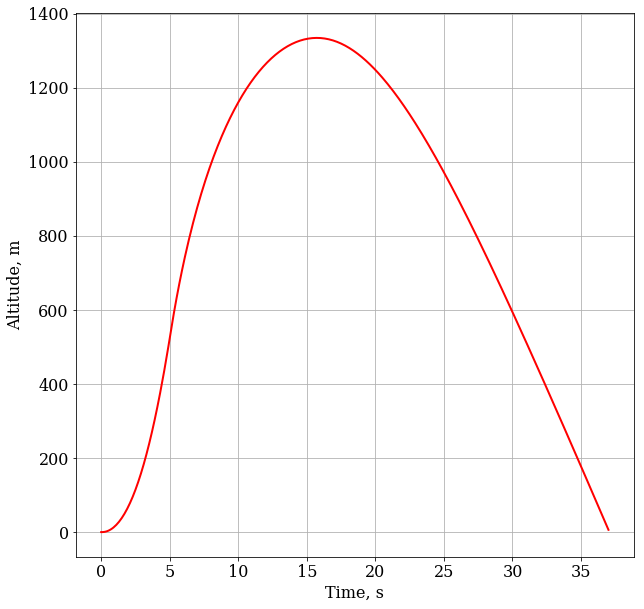

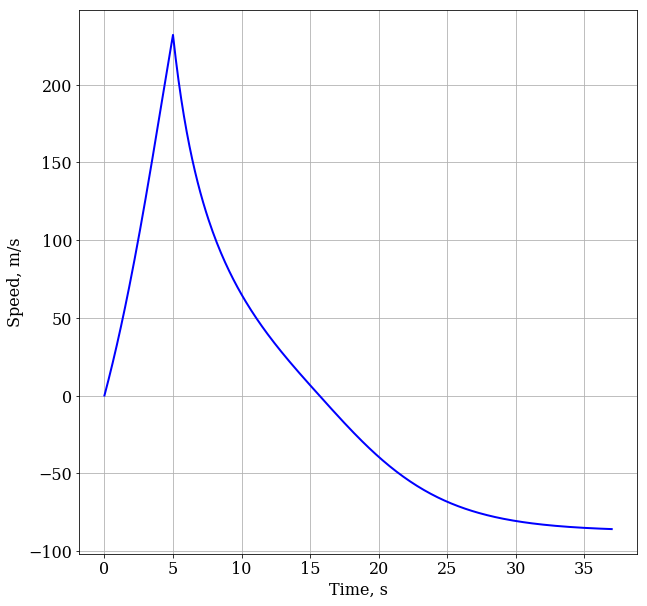

In [34]:
print("Time of flight = {} s".format(t[ground_hit-1]))
fig = plt.figure(figsize = ((10,10)))
plt.plot(t[:ground_hit],h[:ground_hit], linewidth = 2.0, color = 'r')
plt.ylabel('Altitude, m')
plt.xlabel('Time, s')
plt.grid()
plt.show()

fig = plt.figure(figsize = ((10,10)))
plt.plot(t[:ground_hit],v[:ground_hit], linewidth = 2.0, color = 'b')
plt.ylabel('Speed, m/s')
plt.xlabel('Time, s')
plt.grid()
plt.show()

## First question
1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

In [26]:
#print(weight_of_propellant(3.2, 100))
print("Propellant_mass(t = 3.2 s) = {:.1f}.".format(weight_of_propellant(3.2, 100)))

Propellant_mass(t = 3.2 s) = 36.0.


## Second question
2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 

In [27]:
max_v = np.argmax(v)
#print(v[max_v])
#print(t[max_v])
#print(h[max_v])
print("Max speed = {:.2f} m/s, corresponding time = {:.2f} s, corresponding altitude = {:.2f} m.".format(v[max_v], t[max_v], h[max_v]))

Max speed = 232.11 m/s, corresponding time = 5.00 s, corresponding altitude = 523.52 m.


## Third question
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

In [28]:
max_h = np.argmax(h)
#print(v[max_h])
#print(t[max_h])
#print(h[max_h])
print("Max altitude = {:.2f} m, corresponding time = {:.2f} s.".format(h[max_h], t[max_h]))

Max altitude = 1334.18 m, corresponding time = 15.70 s.


## Fourth question
4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

In [29]:
#print(h[ground_hit])
#print(h[ground_hit-1])
#print(v[ground_hit-1])
print("Impact time = {:.2f} s, velocity of rocket at time of impact = {:.2f} m/s.".format(t[ground_hit-1], v[ground_hit-1]))

Impact time = 37.00 s, velocity of rocket at time of impact = -85.98 m/s.
